fT=7.684303 (MHz)
fT=9.827487 (MHz)


e:\python34\lib\site-packages\control\freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
e:\python34\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
e:\python34\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
e:\python34\lib\site-packages\control\freqplot.py:163: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);


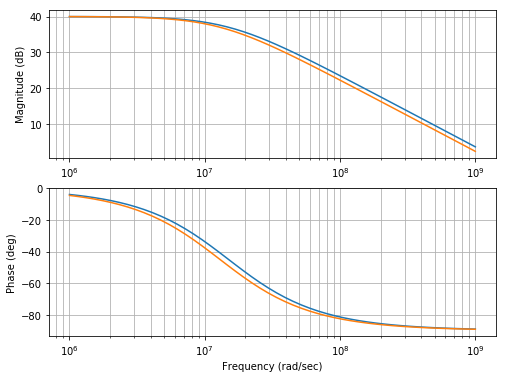

In [36]:
import matplotlib.pyplot as plt
from numpy import pi
from sympy import *
from control import *
# from sympy import init_printing

init_printing()
plt.rc('figure', figsize=(8, 6))

s, B1, B2 = symbols('s B1 B2')

VT = 26e-3
ni = 1.5e16
q = 1.6e-19
epi = 1.04e-10

IC = 0.2
VCB = 3
VCS = 4
Cje0 = 20
Cu0 = 10
Ccs0 = 20
b0 = 100
tF = 15
gamma = 1e-3
phi0 = 0.55
n = 0.5

gm = IC / VT * 1e-3
Cpi = tF * gm * 1e3 + 2 * Cje0
Cu = Cu0 / (1 + VCB / phi0) ** n
fT = 1e12 * gm / ((Cpi + Cu) * 2 * pi)
print('fT=%f (MHz)' % (fT * 1e-6))
B1 = b0 / (1 + b0 * s * 1e-12 * (Cpi + Cu / gm))

IC = 1
VCB = 1
VCS = 2
gm = IC / VT * 1e-3
Cpi = tF * gm * 1e3 + 2 * Cje0
Cu = Cu0 / (1 + VCB / phi0) ** n
fT = 1e12 * gm / ((Cpi + Cu) * 2 * pi)
print('fT=%f (MHz)' % (fT * 1e-6))
B2 = b0 / (1 + b0 * s * 1e-12 * (Cpi + Cu / gm))

D0 = denom(B1)
D1 = Poly(D0).all_coeffs()
D2 = [float(k) for k in D1]
N0 = numer(B1)
N2 = float(N0)

B1b = tf(N2, D2)
bode(B1b, dB=True)

D0 = denom(B2)
D1 = Poly(D0).all_coeffs()
D2 = [float(k) for k in D1]
N0 = numer(B2)
N2 = float(N0)

B2b = tf(N2, D2)
bode(B2b, dB=True)

plt.show()


(a) when IC=0.1mA
gm=3.846154 (mA/V)
rpi=26.000000 (Kohm)
ro=500.000000 (Kohm)
ru=250.000000 (Mohm)
Cpi=4.951120 (pF)
Cu=0.305104 (pF)
Ccs=0.823685 (pF)
(a) when IC=1mA
gm=38.461538 (mA/V)
rpi=2.600000 (Kohm)
ro=50.000000 (Kohm)
ru=25.000000 (Mohm)
Cpi=10.052240 (pF)
Cu=0.305104 (pF)
Ccs=0.823685 (pF)
(a) when IC=5mA
gm=192.307692 (mA/V)
rpi=0.520000 (Kohm)
ro=10.000000 (Kohm)
ru=5.000000 (Mohm)
Cpi=32.723884 (pF)
Cu=0.305104 (pF)
Ccs=0.823685 (pF)


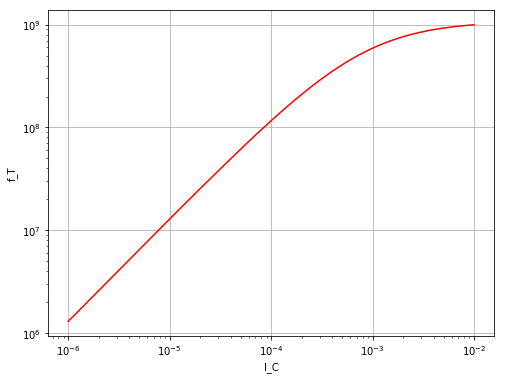

In [69]:
import matplotlib.pyplot as plt
from sympy import *
from numpy import pi, arange

init_printing()
plt.rc('figure', figsize=(8, 6))

VT = 26e-3
ni = 1.5e16
q = 1.6e-19
epi = 1.04e-10

tT1 = 1 / (2 * pi * 600e6)
tT2 = 1 / (2 * pi * 1e9)
Cu1 = 0.15e-12
gm1 = 1e-3 / VT
gm2 = 10e-3 / VT
gamma = 1 / (50e3 * gm1)

x, y = symbols('x y')
S = solve((x + y / gm1 - tT1,  x + y / gm2 - tT2), x, y)
tF = float(S[x])
Cje = float(S[y]) - Cu1

b0 = 100
phi0 = 0.55
Ccs1 = 1e-12
VCB = 2
VCS = 15

print('(a) when IC=0.1mA')
IC = 0.1e-3

gm = IC / VT
rpi = b0 / gm
ro = 1 / (gamma * gm)
ru = 5 * b0 * ro
Cpi = tF * gm + Cje
Cu = Cu1 * sqrt((1 + 10 / phi0) / (1 + VCB / phi0))
Ccs = Ccs1 * sqrt((1 + 10 / phi0) / (1 + VCS / phi0))
print('gm=%f (mA/V)' % (gm * 1e3))
print('rpi=%f (Kohm)' % (rpi * 1e-3))
print('ro=%f (Kohm)' % (ro * 1e-3))
print('ru=%f (Mohm)' % (ru * 1e-6))
print('Cpi=%f (pF)' % (Cpi * 1e12))
print('Cu=%f (pF)' % (Cu * 1e12))
print('Ccs=%f (pF)' % (Ccs * 1e12))

print('(a) when IC=1mA')
IC = 1e-3

gm = IC / VT
rpi = b0 / gm
ro = 1 / (gamma * gm)
ru = 5 * b0 * ro
Cpi = tF * gm + Cje
Cu = Cu1 * sqrt((1 + 10 / phi0) / (1 + VCB / phi0))
Ccs = Ccs1 * sqrt((1 + 10 / phi0) / (1 + VCS / phi0))
print('gm=%f (mA/V)' % (gm * 1e3))
print('rpi=%f (Kohm)' % (rpi * 1e-3))
print('ro=%f (Kohm)' % (ro * 1e-3))
print('ru=%f (Mohm)' % (ru * 1e-6))
print('Cpi=%f (pF)' % (Cpi * 1e12))
print('Cu=%f (pF)' % (Cu * 1e12))
print('Ccs=%f (pF)' % (Ccs * 1e12))

print('(a) when IC=5mA')
IC = 5e-3

gm = IC / VT
rpi = b0 / gm
ro = 1 / (gamma * gm)
ru = 5 * b0 * ro
Cpi = tF * gm + Cje
Cu = Cu1 * sqrt((1 + 10 / phi0) / (1 + VCB / phi0))
Ccs = Ccs1 * sqrt((1 + 10 / phi0) / (1 + VCS / phi0))
print('gm=%f (mA/V)' % (gm * 1e3))
print('rpi=%f (Kohm)' % (rpi * 1e-3))
print('ro=%f (Kohm)' % (ro * 1e-3))
print('ru=%f (Mohm)' % (ru * 1e-6))
print('Cpi=%f (pF)' % (Cpi * 1e12))
print('Cu=%f (pF)' % (Cu * 1e12))
print('Ccs=%f (pF)' % (Ccs * 1e12))


ICx = arange(1e-6,  10e-3,1e-5)
fTx = [1 / (2 * pi * (tF + VT * (Cje + Cu) / k)) for k in ICx]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.loglog(ICx, fTx, 'r')

ax.set_xlabel('I_C')
ax.set_ylabel('f_T')
plt.show()
